In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from scipy.stats import skew

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dados de Qualidade da Água

Os dados contêm parâmetros de qualidade da água de diferentes rios da Índia.

Existem 8 parâmetros e cada parâmetro são os valores médios medidos ao longo de um período de tempo. 


In [ ]:
dados = pd.read_csv("waterquality.csv", sep=',', engine='python')
df= dados
df

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0
...,...,...,...,...,...,...,...,...,...,...,...
529,2940,"GAPE- SAGAR LAKE, DUNGARPUR, RAJASTHAN",RAJASTHAN,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0
530,2941,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 1...",RAJASTHAN,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0
531,2942,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 2...",RAJASTHAN,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0
532,2943,"LODHA TALAB, BANSWARA- DUNGARPUR ROAD, BANSWAR...",RAJASTHAN,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0


* Station Code: Código único para cada lugar
* Locations: Nome do rio e para onde flui
* State: O estado em que o rio está fluindo
* Temp: Valor médio de temperatura
* DO: Valor médio de oxigênio dissolvido
* PH: Valor médio de pH
* Conductivity: Valor médio de condutividade
* BOD: Valor médio da demanda bioquímica de oxigênio
* NITRATE_N_NITRITE_N: Valor médio de nitrato-n e nitrito-n
* FECAL_COLIFORM: Valor médio de coliformes fecais
* TOTAL_COLIFORM: Valor médio de coliformes totais





In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STATION CODE         534 non-null    int64  
 1   LOCATIONS            534 non-null    object 
 2   STATE                534 non-null    object 
 3   TEMP                 529 non-null    float64
 4   DO                   532 non-null    float64
 5   pH                   534 non-null    float64
 6   CONDUCTIVITY         504 non-null    float64
 7   BOD                  528 non-null    float64
 8   NITRATE_N_NITRITE_N  532 non-null    float64
 9   FECAL_COLIFORM       452 non-null    float64
 10  TOTAL_COLIFORM       495 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 46.0+ KB


# Pré-processamento

Checando dados a presença de dados tipo NaN

In [ ]:
dados.isnull().sum()

STATION CODE            0
LOCATIONS               0
STATE                   0
TEMP                    5
DO                      2
pH                      0
CONDUCTIVITY           30
BOD                     6
NITRATE_N_NITRITE_N     2
FECAL_COLIFORM         82
TOTAL_COLIFORM         39
dtype: int64

Substituindo os dados faltantes pela mediana de cada coluna;

In [ ]:
mediana = dados.mean()
dados = dados.fillna(mediana)
dados.isnull().sum()

STATION CODE           0
LOCATIONS              0
STATE                  0
TEMP                   0
DO                     0
pH                     0
CONDUCTIVITY           0
BOD                    0
NITRATE_N_NITRITE_N    0
FECAL_COLIFORM         0
TOTAL_COLIFORM         0
dtype: int64

In [ ]:
dados =dados.drop(['STATION CODE', 'LOCATIONS','STATE'], axis=1)

Verificando as distribuições de cada preditor

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


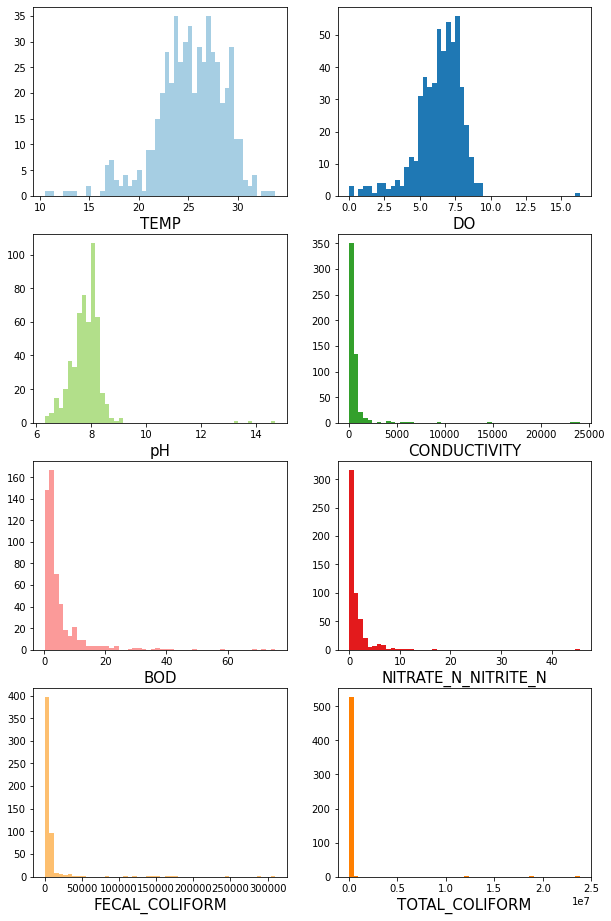

In [ ]:
variaveis = ['TEMP','DO','pH','CONDUCTIVITY','BOD','NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM']

colors = sns.color_palette("Paired")
plt.figure(figsize=(10, 16))
for i in range(0,8):     
     plt.subplot(4, 2, i+1)
     sns.distplot(dados[variaveis[i]],bins=50,color=colors[i],kde=False,hist_kws=dict(alpha=1))
     plt.xlabel(variaveis[i],fontsize=15)



Observando  a média, desvio padrão e a skewness

In [ ]:
datao = { 
    'média': dados.median(),
     'desvio padrão': dados.std(),
    'skew': dados.skew(),
 }
dF = pd.DataFrame(datao, columns= ['média','desvio padrão','skew'])
dF

,média,desvio padrão,skew
TEMP,25.4,3.431802e+00,-0.851265
DO,6.7,1.619814e+00,-0.694053
pH,7.9,6.499504e-01,4.475061
CONDUCTIVITY,389.0,1.718815e+03,10.496411
BOD,2.7,8.452523e+00,4.677572
NITRATE_N_NITRITE_N,0.6,2.798682e+00,8.576574
FECAL_COLIFORM,756.0,2.825283e+04,7.260717
TOTAL_COLIFORM,1450.0,1.404038e+06,14.468084


Conforme é possível observar, os dados apresentam distribuições bastante assimétricas, para tentar minimizar esse problema aplica-se uma normalização pela média, conforme tem-se a seguir
 

A transformação de Yeo-Johnson é utilizada para  estabilizar a variância, e aproximar os dados de uma distribuição normal, além de melhorar a correlação entre as variáveis. Onde Yi corresponde ao vetor de dados a ser transformado. A transformação é dada por:
\begin{equation}
y_i^{\lambda }=\left\{\begin{matrix}
 \left (\left ( y_i+1 \right )^{\lambda } -1 \right )/\lambda  & if \ \lambda  \neq 0,y\geq 0 \\ 
  log\left ( y_i +1 \right ) &if \ \lambda = 0,y \geq  0 \\ 
-\left [\left ( -yi+1 \right )  ^{\left ( 2-\lambda \right )}-1\right ]/\left ( 2-\lambda \right ) &  if \ \lambda  \neq 2,y < 0       \\ 
 - log\left ( -y_i +1 \right ) & if \ \lambda  = 2,y < 0 
\end{matrix}\right.
\end{equation}

In [ ]:
from scipy import stats
TEMP,x = stats.yeojohnson(dados['TEMP'])
DO,x = stats.yeojohnson(dados['DO'])
pH,x = stats.yeojohnson(dados['pH'])
CONDUCTIVITY,x = stats.yeojohnson(dados['CONDUCTIVITY'])
BOD,x = stats.yeojohnson(dados['BOD'])
NITRATE_N_NITRITE_N,x = stats.yeojohnson(dados['NITRATE_N_NITRITE_N'])
FECAL_COLIFORM,x = stats.yeojohnson(dados['FECAL_COLIFORM'])
TOTAL_COLIFORM,x = stats.yeojohnson(dados['TOTAL_COLIFORM'])

varss = { 
    'TEMP': TEMP,
    'DO': DO,
     'pH': pH,
    'CONDUCTIVITY': CONDUCTIVITY,
     'BOD': BOD,
    'NITRATE_N_NITRITE_N': NITRATE_N_NITRITE_N,
     'FECAL_COLIFORM': FECAL_COLIFORM,
     'TOTAL_COLIFORM': TOTAL_COLIFORM,
   
 }

dadosprocessados = pd.DataFrame(data=varss,columns=variaveis)

dadosprocessados

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,3562.710828,13.194776,0.420708,3.864101,0.987440,0.704983,1.426787,4.037390
1,2260.002076,12.070334,0.420648,3.530181,0.957377,0.704983,4.694473,4.822256
2,2583.528041,10.711517,0.420520,3.627391,1.053759,0.988436,4.461245,4.554511
3,2332.256753,10.711517,0.420520,3.642615,1.137763,0.838015,4.958847,5.195598
4,2557.671726,11.248711,0.420585,3.560930,0.967777,0.777165,4.148262,4.548044
...,...,...,...,...,...,...,...,...
529,1963.188919,7.914032,0.420708,3.766348,0.630362,0.519291,1.859786,2.600810
530,1898.387344,10.979049,0.420877,3.796358,0.600754,0.801928,1.664185,2.126269
531,1898.387344,11.520489,0.420929,3.794745,0.630362,0.801928,1.664185,1.890119
532,3406.219944,7.199248,0.420585,3.990988,0.856717,0.704983,2.171435,3.962995


In [ ]:
datao = { 
    'média': dadosprocessados.mean(),
     'desvio padrão': dadosprocessados.std(),
    'skew': dadosprocessados.skew(),
 }
dF = pd.DataFrame(datao, columns= ['média','desvio padrão','skew'])
dF

,média,desvio padrão,skew
TEMP,2533.379850,805.502031,-0.010362
DO,13.443113,4.404442,0.464217
pH,0.420476,0.000362,-0.262481
CONDUCTIVITY,3.660644,0.266508,-0.093665
BOD,0.927253,0.273398,0.086606
NITRATE_N_NITRITE_N,0.388623,0.313202,0.226297
FECAL_COLIFORM,7.188128,3.651412,-0.036529
TOTAL_COLIFORM,6.342914,2.298120,0.012308


# Análise univariada 

Verifica-se que após a aplicação da transformação de yeo as distribuições se aproximaram de uma distriuição normal.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


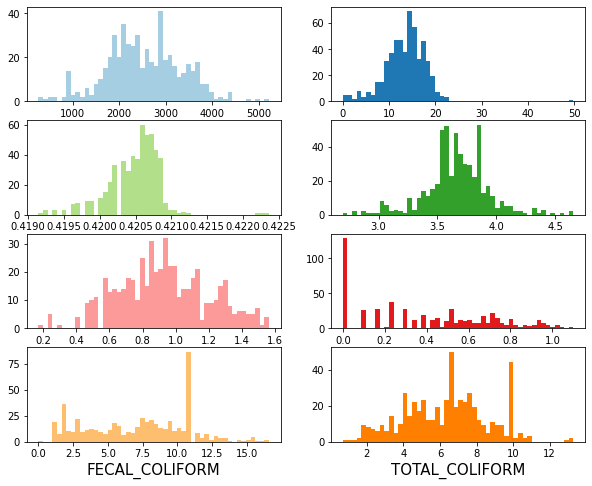

In [ ]:
variaveis = ['TEMP','DO','pH','CONDUCTIVITY','BOD','NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM']

colors = sns.color_palette("Paired")
plt.figure(figsize=(10, 8))
for i in range(0,8):     
     plt.subplot(4, 2, i+1)
     sns.distplot(dadosprocessados[variaveis[i]],bins=50,color=colors[i],kde=False,hist_kws=dict(alpha=1))
     plt.xlabel(variaveis[i],fontsize=15)





Conforme podemos observar, verifica-se a existência de distribuições não simétricas. A seguir observaremos os boxplots de cada preditor, esse tipo de gráfico é útil para mostrar a presença de outliers:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

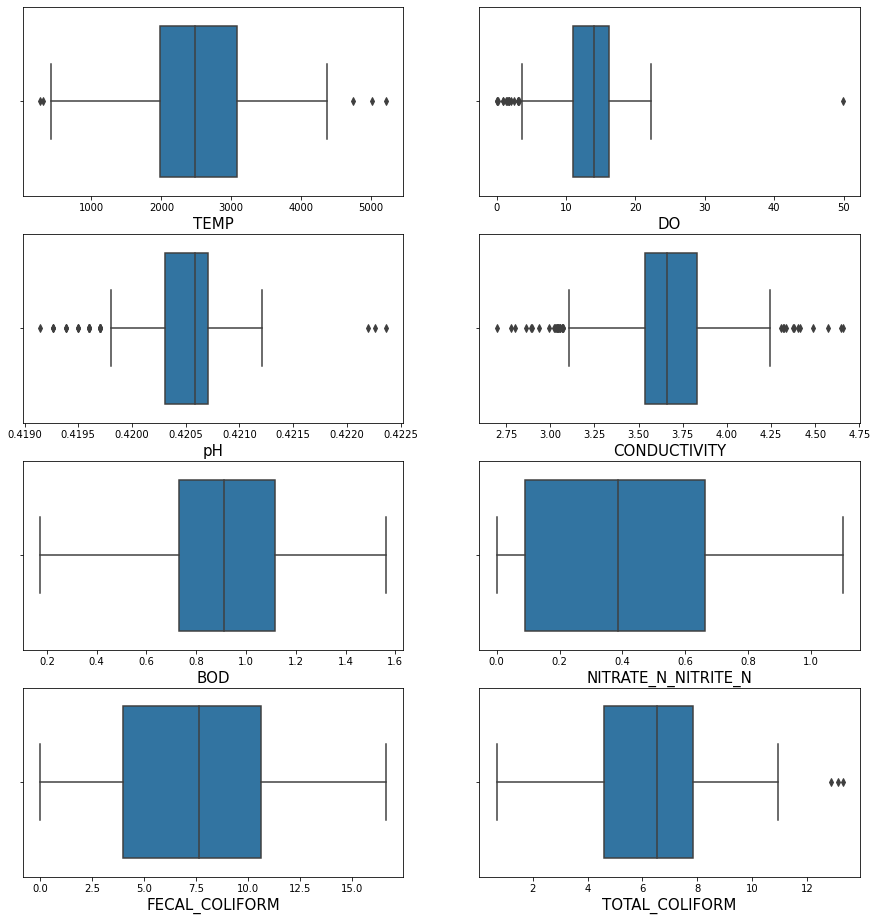

In [ ]:
plt.figure(figsize=(15, 16))
colors = sns.color_palette()
for i in range(0,8):
     
    plt.subplot(4, 2, i+1)
    _ = sns.boxplot(dadosprocessados[variaveis[i]], color=colors[0 % 8])
    plt.xlabel(variaveis[i],fontsize=15)

# 

Análise biavariada
Agora faremos uma análise bivariada, ou seja, vamos verificar como os preditores se comportam aos pares, inicialmente calcularemos a matriz de correlação para cada par. A matriz de correlação tem seu conteúdo composto pelos coeficientes de correlação dos pares 

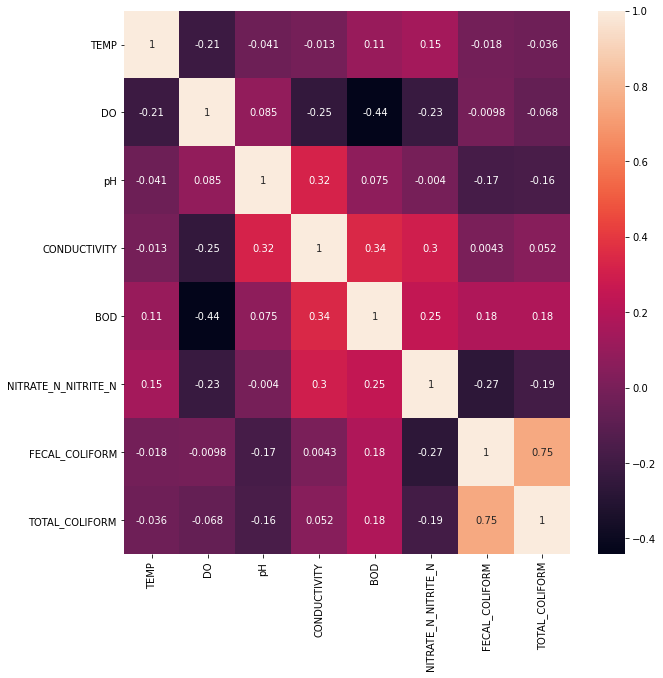

In [ ]:
plt.figure(figsize=(10, 10))
corr = dadosprocessados.corr()
_ = sns.heatmap(corr, annot=True )

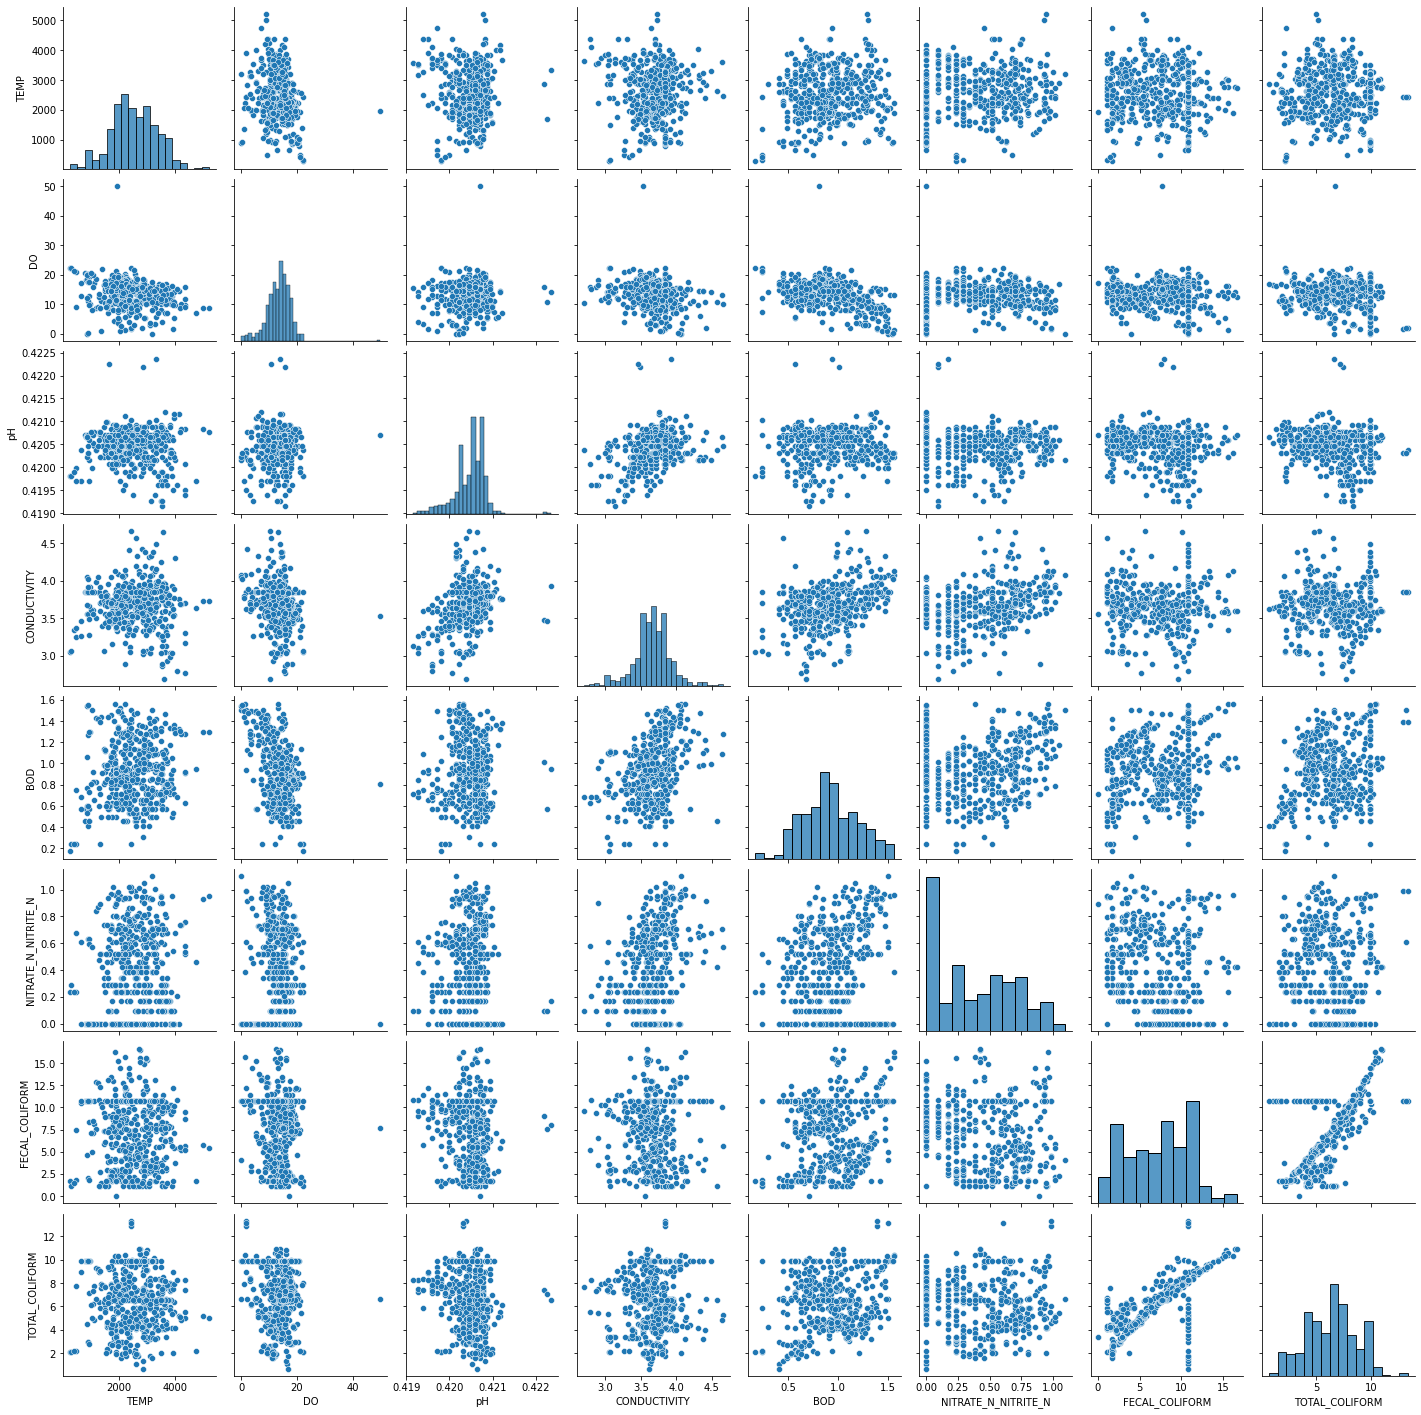

In [ ]:
sns.pairplot(dadosprocessados)
      

#Análise multivariada 

Text(0, 0.5, 'Explained variance')

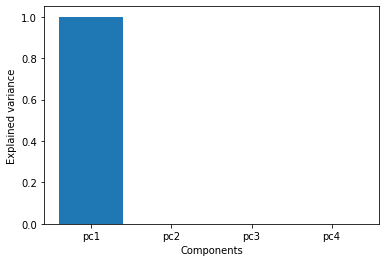

In [ ]:
from sklearn.decomposition import PCA
X = dadosprocessados 
pca = PCA(n_components=4)
pca.fit(X)
X = pca.transform(X)
dadosPCA = pd.DataFrame(X, columns=['pc1','pc2','pc3','pc4'])
plt.bar(['pc1','pc2','pc3','pc4'],pca.explained_variance_ratio_)
plt.xlabel('Components')
plt.ylabel('Explained variance')

In [ ]:
def varpac(X,c):
    X = dadosprocessados 
    pca = PCA(n_components=c)
    pca.fit(X)
    vare=sum (pca.explained_variance_ratio_)
    return vare
varpac(X,3)
componentes=[1,2,3,4]

Text(0, 0.5, 'Variância explicada (%)')

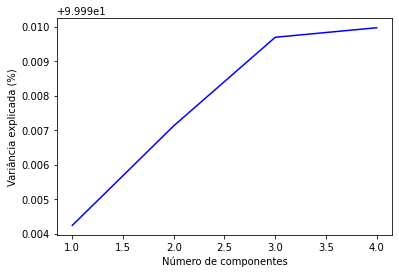

In [ ]:
varacumulada = []
componentes=[1,2,3,4]
for i in range(0,len(componentes)):
    varacumulada.append(varpac(X,componentes[i]))
plt.plot(componentes,100 *np.array(varacumulada),color='b')
plt.xlabel('Número de componentes')
plt.ylabel('Variância explicada (%)')

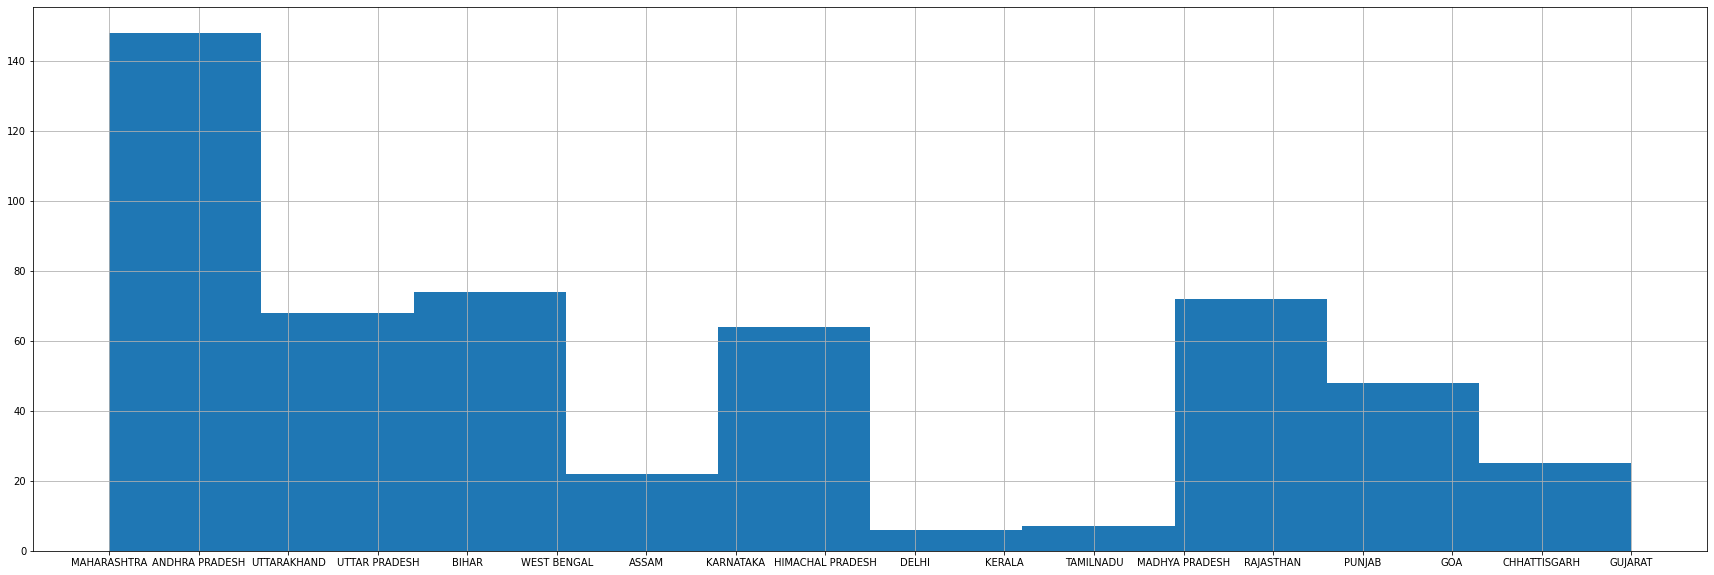

In [ ]:
plt.figure(figsize=(30, 10))
df['STATE'].hist()

In [ ]:
df1 = df[df["STATE"] == 'MAHARASHTRA']
df1 =df1.drop(['STATION CODE', 'LOCATIONS','STATE'], axis=1)

from scipy import stats
TEMP,x = stats.yeojohnson(df1['TEMP'])
DO,x = stats.yeojohnson(df1['DO'])
pH,x = stats.yeojohnson(df1['pH'])
CONDUCTIVITY,x = stats.yeojohnson(df1['CONDUCTIVITY'])
BOD,x = stats.yeojohnson(df1['BOD'])
NITRATE_N_NITRITE_N,x = stats.yeojohnson(df1['NITRATE_N_NITRITE_N'])
FECAL_COLIFORM,x = stats.yeojohnson(df1['FECAL_COLIFORM'])
TOTAL_COLIFORM,x = stats.yeojohnson(df1['TOTAL_COLIFORM'])

varss = { 
    'TEMP': TEMP,
    'DO': DO,
     'pH': pH,
    'CONDUCTIVITY': CONDUCTIVITY,
     'BOD': BOD,
    'NITRATE_N_NITRITE_N': NITRATE_N_NITRITE_N,
     'FECAL_COLIFORM': FECAL_COLIFORM,
     'TOTAL_COLIFORM': TOTAL_COLIFORM,
   
 }

df1p = pd.DataFrame(data=varss,columns=variaveis)

mediana = df1p.mean()
df1p = df1p.fillna(mediana)
df1p.isnull().sum()
X =  df1p
pca = PCA(n_components=4)
pca.fit(df1p)
X = pca.transform(X)
dadosPCA1 = pd.DataFrame(X, columns=['pc1','pc2','pc3','pc4'])

In [ ]:
df2 = df[df["STATE"] == 'ANDHRA PRADESH']
df2 =df2.drop(['STATION CODE', 'LOCATIONS','STATE'], axis=1)

from scipy import stats
TEMP,x = stats.yeojohnson(df2['TEMP'])
DO,x = stats.yeojohnson(df2['DO'])
pH,x = stats.yeojohnson(df2['pH'])
CONDUCTIVITY,x = stats.yeojohnson(df2['CONDUCTIVITY'])
BOD,x = stats.yeojohnson(df2['BOD'])
NITRATE_N_NITRITE_N,x = stats.yeojohnson(df2['NITRATE_N_NITRITE_N'])
FECAL_COLIFORM,x = stats.yeojohnson(df2['FECAL_COLIFORM'])
TOTAL_COLIFORM,x = stats.yeojohnson(df2['TOTAL_COLIFORM'])

varss = { 
    'TEMP': TEMP,
    'DO': DO,
     'pH': pH,
    'CONDUCTIVITY': CONDUCTIVITY,
     'BOD': BOD,
    'NITRATE_N_NITRITE_N': NITRATE_N_NITRITE_N,
     'FECAL_COLIFORM': FECAL_COLIFORM,
     'TOTAL_COLIFORM': TOTAL_COLIFORM,
   
 }

df2 = pd.DataFrame(data=varss,columns=variaveis)

mediana = df2.mean()
df2 = df1p.fillna(mediana)
df2.isnull().sum()
X =  df2
pca = PCA(n_components=4)
pca.fit(df2)
X = pca.transform(X)
dadosPCA2 = pd.DataFrame(X, columns=['pc1','pc2','pc3','pc4'])

In [ ]:
df3 = df[df["STATE"] == 'UTTARAKHAND']
df3=df3.drop(['STATION CODE', 'LOCATIONS','STATE'], axis=1)

from scipy import stats
TEMP,x = stats.yeojohnson(df3['TEMP'])
DO,x = stats.yeojohnson(df3['DO'])
pH,x = stats.yeojohnson(df3['pH'])
CONDUCTIVITY,x = stats.yeojohnson(df3['CONDUCTIVITY'])
BOD,x = stats.yeojohnson(df3['BOD'])
NITRATE_N_NITRITE_N,x = stats.yeojohnson(df3['NITRATE_N_NITRITE_N'])
FECAL_COLIFORM,x = stats.yeojohnson(df3['FECAL_COLIFORM'])
TOTAL_COLIFORM,x = stats.yeojohnson(df3['TOTAL_COLIFORM'])

varss = { 
    'TEMP': TEMP,
    'DO': DO,
     'pH': pH,
    'CONDUCTIVITY': CONDUCTIVITY,
     'BOD': BOD,
    'NITRATE_N_NITRITE_N': NITRATE_N_NITRITE_N,
     'FECAL_COLIFORM': FECAL_COLIFORM,
     'TOTAL_COLIFORM': TOTAL_COLIFORM,
   
 }

df3 = pd.DataFrame(data=varss,columns=variaveis)

mediana = df3.mean()
df3 = df3.fillna(mediana)
df3.isnull().sum()
X =  df1p
pca = PCA(n_components=4)
pca.fit(df3)
X = pca.transform(X)
dadosPCA3 = pd.DataFrame(X, columns=['pc1','pc2','pc3','pc4'])

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1478: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1984: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


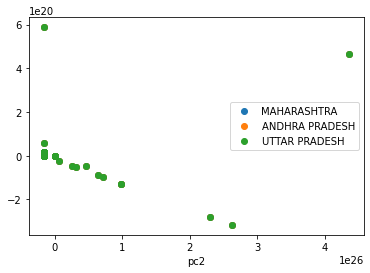

In [ ]:
plt.scatter(dadosPCA1['pc1'],dadosPCA1['pc2'],label='MAHARASHTRA')
plt.scatter(dadosPCA2['pc1'],dadosPCA2['pc2'],label='ANDHRA PRADESH')
plt.scatter(dadosPCA2['pc1'],dadosPCA2['pc2'],label='UTTAR PRADESH')
plt.xlabel('pc1')
plt.xlabel('pc2')
plt.legend()

In [ ]:
df1p

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1.431436,196.258617,9141.967927,2.827610,0.955937,0.823540,1.488462e+04,8.098267e+14
1,1.409274,164.022440,8665.422414,2.673581,0.928032,0.823540,7.216580e+14,1.737001e+18
2,1.416028,129.104021,7771.494061,2.720431,1.017125,1.302760,1.370080e+14,1.239161e+17
3,1.410882,129.104021,7771.494061,2.727620,1.093830,1.026311,4.669516e+15,7.192059e+19
4,1.415528,142.383788,8208.805611,2.688576,0.937697,0.930148,1.442505e+13,1.162965e+17
...,...,...,...,...,...,...,...,...
100,1.411936,149.363306,10157.403577,2.775594,1.190527,0.918063,1.086456e+09,1.424168e+12
101,1.409814,105.145783,10157.403577,2.783468,1.213371,0.990878,1.580212e+11,3.457590e+13
102,1.413494,94.401674,10697.605664,2.862101,1.268765,1.365503,1.239161e+17,2.281009e+19
103,1.439256,110.820464,10157.403577,2.751717,1.219541,0.874139,3.150535e+16,2.086209e+18


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


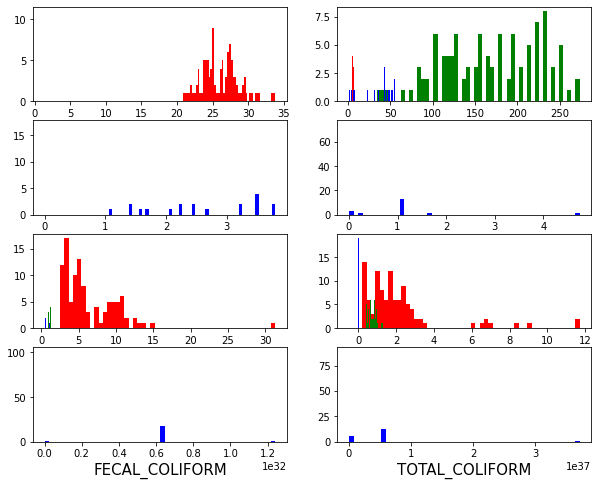

In [ ]:
colors = sns.color_palette("Paired")
plt.figure(figsize=(10, 8))
for i in range(0,8):     
     plt.subplot(4, 2, i+1)
     sns.distplot(df1[variaveis[i]],bins=50,color='r',kde=False,hist_kws=dict(alpha=1))
     sns.distplot(df2[variaveis[i]],bins=50,color='g',kde=False,hist_kws=dict(alpha=1))
     sns.distplot(df3[variaveis[i]],bins=50,color='b',kde=False,hist_kws=dict(alpha=1))
     plt.xlabel(variaveis[i],fontsize=15)
